<a href="https://colab.research.google.com/github/AviratGupta/Geeksman-AISquad-project1-AVIRAT/blob/master/project_finger_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Finger detection is an interesting topic to explore in image processing, especially when it is applied in human-computer interaction.

google drive folder link.

(https://drive.google.com/drive/folders/17kOzD3VSzUKqMXBOZrFB8xlamxELjupV?usp=sharing)

In [ ]:
%%html
<marquee style='width: 70%; height:70%; color: green;'><b>welcome to my project</b></marquee>

# **Overview**

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Setting up an environment for kaggle api.

In [3]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

To download the required dataset by copying api from kaggle and run in command line.we use ! in google colab to execute any command.


In [4]:
!kaggle datasets download -d aviratgupta/finger-identify

 70% 31.0M/44.2M [00:01<00:00, 20.7MB/s]
100% 44.2M/44.2M [00:01<00:00, 33.9MB/s]


unzipping the zip file which we have downloaded by command line.

In [ ]:
!unzip "*.zip"

# importing important libraries like fastai,warning.

we ignore all the warnings we ger in future using "ignore".

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

initialising batch size as 64.

Batch size is a term used in deep learning and refers to the number of training examples utilized in one iteration.

In [7]:
bs = 64 

we have to give a path to shows images and we can also give the transformation so that machine can read both normal and flipped image.

In [8]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("fingers/fingers"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

some sample images on our dataset.

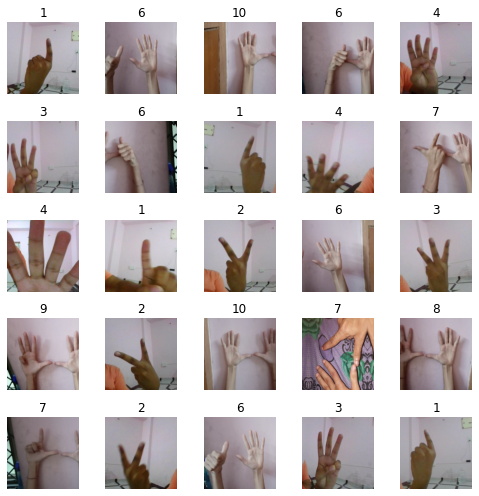

In [9]:
data.show_batch(rows=5, figsize=(7,7))

In [10]:
print(data.classes)
len(data.classes)

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


10

# Time to learn our model..

The most important functions of this module are cnn_learner. They will help you define a Learner using a pretrained model.

***resnet 50***

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.
here we are using fingers as object.

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


fit_one_cycle will launch a training using the 1cycle policy to help you train your model faster.

here 4 is the number of time we want to train our model known as epochs.

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.919207,1.083014,0.617021,00:27
1,1.140336,0.720251,0.835106,00:23
2,0.837612,0.178116,0.930851,00:23
3,0.642705,0.089261,0.978723,00:23


till now , we have train our model.

Now we have to save in our google drive using (os.mkdir)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


makedirs() creates all the intermediate directories if they don't exist (just like mkdir -p in bash).

mkdir() can create a single sub-directory, and will throw an exception if intermediate directories that don't exist are specified.

we create a folder named project.

In [ ]:
os.makedirs("/content/drive/My Drive/project",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/project"

we now save our model using learn.save.

In [ ]:
learn.save(my_dir+"/Stage-1")

We will now load our trained data.

In [ ]:
learn.load("/content/drive/My Drive/project/Stage-1")

we will make a export.pkl file from inbuilt library pickle from python.


In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
!pip install -U kora
from kora.drive import upload_public
url = upload_public(my_dir+"/export.pkl")
url

'https://drive.google.com/uc?id=1ny6XSR4XJBO7im0s7F0TClGEWewcLZXY'

performing classification of our images.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

perdiction of our images.

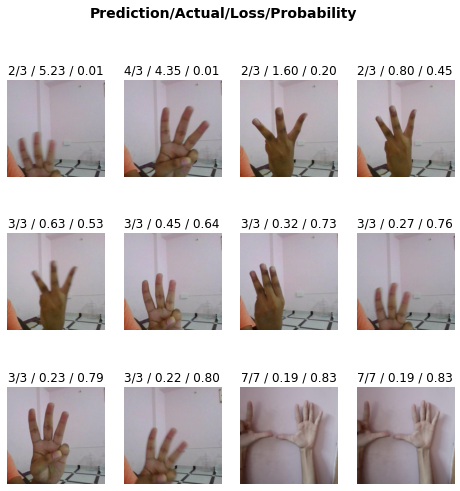

In [ ]:
interp.plot_top_losses(12, figsize=(8,8))

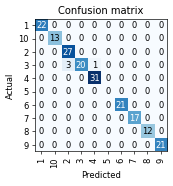

In [ ]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('3', '2', 3)]

# prediction time..

Here our predictions start by creatingn a function my_predictor which open a test image and try to predict the image.

In [ ]:
Predict = load_learner(my_dir)
def predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=Predict.predict(test_img)
  return pred_class


gives us a predicted image and predicted number.

1


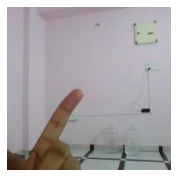

In [ ]:
test_img = os.listdir("test_fingers/test_fingers")
index = 0
print(predictor("test_fingers/test_fingers/"+test_img[index]))
img = open_image("test_fingers/test_fingers/"+test_img[index])
img.show()


# creating video of all trained images in the folder.

parameters in opecv2 for editing.

img: your image

text: a string of text to print on image

org: bottom-left corner of the text string in the image (x,y)

font: font type

fontScale: font scale

color: text color (B,G,R)

thickness: text line thickness

lineType: line type (8)

In [ ]:
import cv2
test_files = os.listdir("test_fingers/test_fingers")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img = cv2.imread("test_fingers/test_fingers/"+test_file)
  cv2.imwrite("sample.jpg",img)
  ans_text = predictor("sample.jpg")
  font = cv2.FONT_HERSHEY_TRIPLEX
  i += 1
  org = (0, 50) 
  fontScale = 1
  color = (80,128,40)
  thickness = 3
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../final_result.mp4
%cd ..

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


In [ ]:
url = upload_public('final_result.mp4')
url

'https://drive.google.com/uc?id=1P5TY6G9b7NeNqV9JjSeJy5le42t2FiYT'

we use general html code to display video.

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width="320" controls/>""")